# Taller 1 - MINE 4101: Ciencia de Datos Aplicada
## Semestre: 2023-20
## Javier Ramírez Silva - 201821781

## Caso

Como consultor científico de datos especializado en el sector inmobiliario y Airbnb, el objetivo es ayudar a individuos y empresas que desean invertir en propiedades para alquiler en la plataforma Airbnb. El desafío es tomar decisiones informadas sobre la selección de sectores de la ciudad, tipos de propiedades y otros factores clave para lograr una rentabilidad sostenible a través de una alta tasa de ocupación y tarifas de alquiler competitivas. Se proporciona un conjunto de datos que incluye información detallada sobre las propiedades de Airbnb en Munich, Alemania, que abarca atributos como ubicación, detalles del anfitrión, tipo de propiedad, precio, disponibilidad futura, calificaciones y más. El objetivo es utilizar técnicas estadísticas y visualización de datos para descubrir patrones, tendencias y oportunidades que sean valiosas para los inversores interesados en el mercado de alquiler de Airbnb en Munich.

## Objetivo General
Utilizar técnicas de análisis de datos y visualización para identificar oportunidades de inversión en propiedades para alquiler en la plataforma Airbnb, maximizando la rentabilidad a través de la selección estratégica de sectores de la ciudad, tipos de propiedades y tarifas competitivas, basándose en un conjunto de datos detallado y específico de la ciudad objetivo.

## Objetivos Específicos

* Generar un breve reporte de entendimiento inicial de datos que resalte las dimensiones del dataset, los tipos de datos presentes y proporcione información sobre los cinco atributos considerados más importantes para el análisis. Para cada uno de estos atributos, se llevará a cabo un análisis univariado que incluirá elementos básicos de su comportamiento o distribución, como medidas de tendencia central, dispersión y visualización gráfica.

* Realizar un análisis de correlación y de Pareto con el fin de determinar la influencia de variables de entrada en variables de respuesta.

* Determinar variables de entrada y de respuesta con el fin de poder mediante un análisis multivariado determinar los niveles de las variables que resulten en las mejores alternativas de inversión.

* Generar un informe ejecutivo que resuma los resultados clave, destacando los sectores de la ciudad, tipos de propiedades y rangos de precios recomendados para la inversión. Presentar los hallazgos de manera visual utilizando gráficos y tablas claras y efectivas, respaldando las recomendaciones estratégicas basadas en datos y análisis sólidos.

## [20%] Entendimiento de datos 
En este notebook se abordan dos aspectos importantes para el entendimiento de un conjunto de datos:

* Exploración y perfilamiento de datos
    * Carga
    * Descripción básica
    * Visualización
    * Perfilamiento
<br>
* Calidad de datos e ideas de preparación
  * Completitud
  * Unicidad / Duplicidad
  * Validez / Estandarizacón

## Los datos
Se trabaja con un conjunto de datos de propiedades para la ciudad de Munich, Alemania proporcionado por la plataforma AirBnb. El dataset contiene propiedades relevantes para cada propiedad, así como barrio, tipo de propiedad, precio por noche, número de reviews, puntuación, disponibilidad, amenities, entre otras.

### Importación de librerías 

En las siguientes líneas de código se importan las librerías y herramientas necesarias para desarrollar el caso de uso.

In [1]:
pip install spicy

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Importar librerías
from spicy import stats
import pandas as pd
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.impute import KNNImputer


In [3]:
pd.set_option('display.max_columns', None) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 200) # Numero máximo de filas a mostar

## Exploración y Perfilamiento de datos

### Carga de los datos
* La carga de los datos se realiza desde de un archivo CSV y se almacena en una estructuras de datos de Pandas conocida como dataframe.
* Se utiliza encoding UTF-8.
* El separador del archivo de los datos es ','.

In [4]:
df = pd.read_csv('./listings.csv', encoding = "UTF-8", sep = ',')
# Se elimina las columnas 'Unnamed' que pueden surgir en ciertas ocasiones
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [5]:
# Dimensiones del dataframe
df.shape

(5677, 75)

En primera instancia se quiere entender los datos que proporciona la empresa. Por esto se les solicita que se entregue el diccionario de datos y en base a los datos y el diccionario se tiene buena información para comenzar: 

Se compartieron datos de 5677 propiedades con 75 columnas de propiedades.

A continuación se previsualiza una muestra aleatoria de los datos:

In [6]:
# Impresión de algunos registros del dataframe
df.sample(5) # Muestra aleatoria

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
4945,902161191965155690,https://www.airbnb.com/rooms/902161191965155690,20230627053437,2023-06-27,city scrape,Rental unit in Munich · ★New · 1 bedroom · 1 b...,Unsere Wohnung liegt im Stadtteil Thalkirchen....,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,46921878,https://www.airbnb.com/users/show/46921878,Aline,2015-10-19,"Munich, Germany",Wir sind eine Familie mit zwei Teenager-Töchte...,within an hour,100%,100%,NaN,https://a0.muscache.com/im/pictures/user/7e4ad...,https://a0.muscache.com/im/pictures/user/7e4ad...,NaN,7,8,"['email', 'phone', 'work_email']",t,t,NaN,Thalkirchen-Obersendling-Forstenried-Fürstenri...,NaN,48.103415,11.541858,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Central heating"", ""Hangers"", ""Coffee maker: ...",$128.00,7,365,7,7,365,365,7.0,365.0,NaN,t,27,57,63,63,2023-06-27,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,2,1,1,0,NaN
2745,9450141,https://www.airbnb.com/rooms/9450141,20230627053437,2023-06-27,city scrape,Rental unit in Munich · ★5.0 · Studio · 2 beds...,"- Cozy, bright home, individually furnished<br...",The area is very green. The Isar is very close...,https://a0.muscache.com/pictures/miso/Hosting-...,48969527,https://www.airbnb.com/users/show/48969527,Petra,2015-11-13,"Munich, Germany",NaN,within a few hours,100%,70%,f,https://a0.muscache.com/im/pictures/user/1911c...,https://a0.muscache.com/im/pictures/user/1911c...,Thalkirchen - Obersendling - Forstenried - Für...,4,5,['phone'],t,t,"Munich, Bayern, Germany",Thalkirchen-Obersendling-Forstenried-Fürstenri...,NaN,48.085360,11.522200,Entire rental unit,Entire home/apt,1,NaN,1 bath,NaN,2.0,"[""Essentials"", ""Dryer"", ""Heating"", ""TV with st...",$43.00,90,360,90,90,360,360,90.0,360.0,NaN,t,0,0,0,146,2023-06-27,7,0,0,2015-12-05,2022-01-04,5.00,5.00,5.00,5.00,4.71,4.67,4.67,NaN,f,3,3,0,0,0.08
1304,29499003,https://www.airbnb.com/rooms/29499003,20230627053437,2023-06-27,previous scrape,Rental unit in Munich · ★4.69 · 4 bedrooms · 5...,Sleep in the heart of Munich! Ruhig gelegen i...,NaN,https://a0.muscache.com/pictures/0a0c73b7-21ce...,222159766,https://www.airbnb.com/users/show/222159766,Ludwig,2018-10-23,NaN,AADLON BETRIEBSWOHNUNGEN GMBH\r\nGASTEIG 3\r\n...,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/0cc51...,https://a0.muscache.com/im/pictures/user/0cc51...,Ludwigsvorstadt - Isarvorstadt,3,4,"['email', 'phone']",t,t,NaN,Ludwigsvorstadt-Isarvorstadt,NaN,48.135550,11.562450,Entire rental unit,Entire home/apt,6,NaN,2 baths,4.0,5.0,"[""Hangers"", ""First aid kit"", ""Coffee maker"", ""...",$122.00,2,1125,2,2,1125,1125,2.0,1125.0,NaN,t,0,0,0,0,2023-06-27,90,1,0,2018-11-30,2023-03-01,4.69,4.81,4.9

### Exploración y descripción de los datos

A continuación se presenta el tipo de dato asociado a cada columna del set de datos junto con su cuenta de no-nulos:

In [7]:
# Impresión del tipo de dato asociado a cada columna y su cuenta de no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5677 entries, 0 to 5676
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5677 non-null   int64  
 1   listing_url                                   5677 non-null   object 
 2   scrape_id                                     5677 non-null   int64  
 3   last_scraped                                  5677 non-null   object 
 4   source                                        5677 non-null   object 
 5   name                                          5677 non-null   object 
 6   description                                   5549 non-null   object 
 7   neighborhood_overview                         2521 non-null   object 
 8   picture_url                                   5677 non-null   object 
 9   host_id                                       5677 non-null   i

In [8]:
# ¿Hay ausencias?
df.isna().sum()/len(df)

id                                              0.000000
listing_url                                     0.000000
scrape_id                                       0.000000
last_scraped                                    0.000000
source                                          0.000000
name                                            0.000000
description                                     0.022547
neighborhood_overview                           0.555927
picture_url                                     0.000000
host_id                                         0.000000
host_url                                        0.000000
host_name                                       0.000000
host_since                                      0.000000
host_location                                   0.188304
host_about                                      0.564383
host_response_time                              0.274441
host_response_rate                              0.274441
host_acceptance_rate           

Se ve que hay varias columnas con ausencias significativas (>90%). Por esta razón se eliminarán estas columnas que no tiene sentido imputar. Estas son:
* neighbourhood_group_cleansed
* bathrooms
* calendar_updated
* license

In [9]:
columns_to_drop = ['neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated', 'license']
df.drop(columns=columns_to_drop, inplace=True)

Revisamos el número de entradas únicas

In [10]:
df["id"].nunique()

5677

Vemos que no existen entradas duplicadas por id.

Procedemos a mantener las columnas útiles para el análisis a realizar. A continuación se detallan las categorías de columnas a mantener y la razón por la cual se mantienen:
* host_since: La antiguedad del anfitrion en la plataforma puede ser una variable clave que puede influir en la calidad de su atención.
* host_response_time: El tiempo de respuesta es un indicador directo de la atención prestada por el anfitrion.
* host_aceptance_rate: Determina la selectividad de la acomodación.
* host_is_superhost: El hecho de ser super-host puede influir en la calidad de su atención.
* host_identity_verified: La verificación de identidad es un factor clave para muchas personas al momento de escoger su acomodación.
* neighbourhood_cleansed: El barrio es uno de los factores geográficos más influyentes para escoger una propiedad.
* property_type: El tipo de propiedad influye en el precio y en que tan apetecida es la propiedad.
* room_type: El tipo de acomodación es también un buen factor de segregación para propiedades.
* accommodates: La capacidad máxima resulta un factor determinante en el precio.
* bathrooms_text: Número de baños de la propiedad.
* bedrooms: Número de habitaciones de la propiedad.
* beds: Número de camas de la propiedad.
* price: Precio por noche en dólares.
* has_availability: La disponibilidad es un factor importante para determinar que tan apetecido es la acomodación.
* availability_365: El número de días disponibles en un intervalo del año también es buen indicador de la popularidad de la acomodación.
* number_of_reviews: El número de reseñas es de los factores mas relevantes que tienen en cuenta los usuarios al elegir acomodación.
* review_scores_rating: La calificación del alojamiento podría ser facilmente el factor más importante para definir la preferencia del usuario.
* review_scores_accuracy: Subcategoría de review que sirve para determinar los aspectos más importantes que contribuyen a la calificación total.
* review_scores_cleanliness: Subcategoría de review que sirve para determinar los aspectos más importantes que contribuyen a la calificación total.
* review_scores_checkin: Subcategoría de review que sirve para determinar los aspectos más importantes que contribuyen a la calificación total.
* review_scores_communication: Subcategoría de review que sirve para determinar los aspectos más importantes que contribuyen a la calificación total.
* review_scores_location: Subcategoría de review que sirve para determinar los aspectos más importantes que contribuyen a la calificación total.
* review_scores_value: Subcategoría de review que sirve para determinar los aspectos más importantes que contribuyen a la calificación total.
* instant_bookable: El hecho de poder reservar sin aprobación del arrendatario resulta atractivo para muchos usuarios.
* reviews_per_month: A diferencia del número de reseñas también da información acerca de la temporalidad de los reviews.

In [11]:
columns_to_keep = ['host_since', 'host_response_time', 'host_acceptance_rate', 'host_is_superhost', 'host_identity_verified', 'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'price', 'has_availability', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'reviews_per_month']
df = df[columns_to_keep]

Debido a que para el propósito de este taller solo se realizarán análisis estadísticos de los diferentes factores y no se aplicará ningún algoritmo de aprendizaje automático supervisado, se escogerán solo 5 atributos que se consideran de mayor relevancia para el análisis estadístico, estos serán:
* neighbourhood_cleansed
* property_type
* price
* number_of_reviews
* review_scores_rating

Por lo cual solo se trabajará con estos atributos:

In [12]:
columns_stat_analysis = ['neighbourhood_cleansed', 'property_type', 'price', 'number_of_reviews', 'review_scores_rating']
df = df[columns_stat_analysis]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5677 entries, 0 to 5676
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  5677 non-null   object 
 1   property_type           5677 non-null   object 
 2   price                   5677 non-null   object 
 3   number_of_reviews       5677 non-null   int64  
 4   review_scores_rating    4565 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 221.9+ KB


Vemos que solo existen problemas de completitud con la variable review_scores_ratings. Se nota que aquellos valores nulos de la variable 'review_scores_rating' corresponden a aquellas entradas cuyo número de reviews son 0. Por lo cual se aplicará una estrategia de imputación por categoría, es decir, los valores nulos se reemplazarán con la mediana del score para las localidades con el mismo barrio (neighbourhood_cleansed) realizaremos esto con las funciones 'groupby()', 'median()' y 'apply()' de pandas.

In [14]:
#Calcular la media de 'review_scores_rating' por cada grupo de 'neighbourhood_cleansed'
median_by_neighbourhood = df.groupby('neighbourhood_cleansed')['review_scores_rating'].median()
#Llenar valores faltantes en 'review_scores_rating' basado en la mediana de los valores de 'neighbourhood_cleansed' agrupados
df['review_scores_rating'] = df.apply(
    lambda row: median_by_neighbourhood[row['neighbourhood_cleansed']] if pd.isna(row['review_scores_rating']) else row['review_scores_rating'],
    axis=1
)

In [15]:
df.sample(10)

,neighbourhood_cleansed,property_type,price,number_of_reviews,review_scores_rating
2557,Sendling-Westpark,Private room in home,$261.00,76,4.95
5443,Aubing-Lochhausen-Langwied,Entire rental unit,$95.00,3,4.67
3447,Sendling,Entire rental unit,$160.00,5,4.80
4488,Berg am Laim,Entire rental unit,$66.00,4,5.00
4719,Tudering-Riem,Private room in condo,$200.00,2,5.00
2679,Thalkirchen-Obersendling-Forstenried-Fürstenri...,Private room in home,$65.00,19,4.95
5513,Laim,Entire rental unit,$163.00,3,4.33
1919,Sendling-Westpark,Entire loft,$180.00,2,5.00
5536,Bogenhausen,Private room in townhouse,$112.00,72,4.94
3983,Neuhausen-Nymphenburg,Entire rental unit,$85.00,14,4.86


In [16]:
df.isna().sum()/len(df)

neighbourhood_cleansed    0.0
property_type             0.0
price                     0.0
number_of_reviews         0.0
review_scores_rating      0.0
dtype: float64

Vemos que la imputación se realizó de la manera deseada. Y debido a que a lo largo de el análisis hemos verificado la unicidad, validez y completitud de los datos, procederemos al análisis univariado.

### Análisis univariado

Procederemos a hacer un breve análisis univariado para cada columna del set de datos:

#### Variable Barrio ('neighbourhood_cleansed')

In [17]:
df["neighbourhood_cleansed"].unique()

array(['Bogenhausen', 'Maxvorstadt', 'Schwanthalerhöhe', 'Altstadt-Lehel',
       'Ludwigsvorstadt-Isarvorstadt', 'Au-Haidhausen', 'Obergiesing',
       'Sendling-Westpark', 'Aubing-Lochhausen-Langwied',
       'Neuhausen-Nymphenburg', 'Moosach', 'Ramersdorf-Perlach',
       'Untergiesing-Harlaching', 'Tudering-Riem', 'Sendling',
       'Milbertshofen-Am Hart', 'Schwabing-Freimann', 'Schwabing-West',
       'Laim', 'Berg am Laim', 'Pasing-Obermenzing',
       'Thalkirchen-Obersendling-Forstenried-Fürstenried-Solln', 'Hadern',
       'Allach-Untermenzing', 'Feldmoching-Hasenbergl'], dtype=object)

Vemos que no existen problemas de duplicidad por errores de digitación.

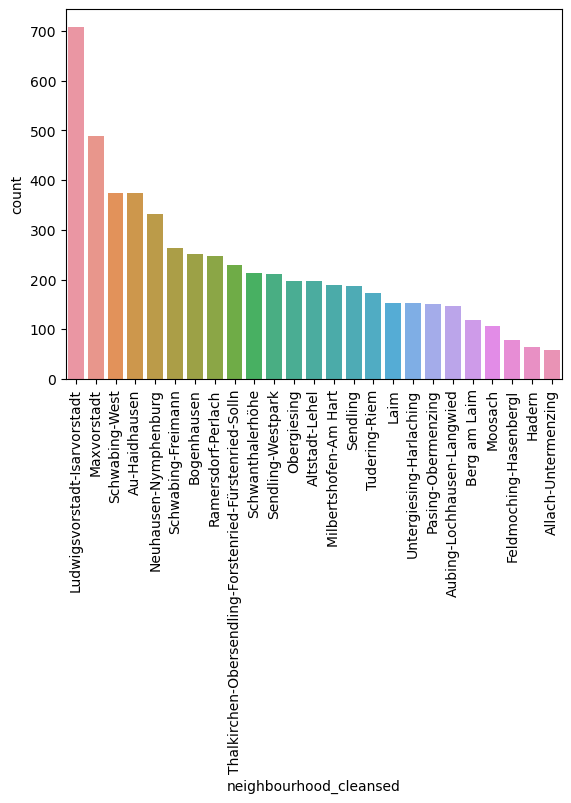

In [18]:
ax = sns.countplot(x='neighbourhood_cleansed', data=df, order=df['neighbourhood_cleansed'].value_counts().index)
plt.xticks(rotation=90);

Vemos la distribución de las propiedades por barrio, lo que nos da una idea de los barrios donde más y menos oferta de propiedades existen.

#### Variable Tipo de Propiedad ('property_type')

In [19]:
df["property_type"].unique()

array(['Entire condo', 'Entire rental unit',
       'Private room in rental unit', 'Entire vacation home',
       'Room in boutique hotel', 'Entire home',
       'Shared room in rental unit', 'Room in hotel',
       'Private room in bed and breakfast', 'Private room in home',
       'Room in aparthotel', 'Tiny home', 'Entire loft',
       'Shared room in condo', 'Camper/RV', 'Private room in condo',
       'Private room in townhouse', 'Entire serviced apartment',
       'Private room in hostel', 'Entire villa',
       'Shared room in guesthouse', 'Private room in tent',
       'Private room in guest suite', 'Entire townhouse',
       'Private room in serviced apartment', 'Private room in loft',
       'Private room in vacation home', 'Private room in casa particular',
       'Shared room in tent', 'Private room', 'Private room in villa',
       'Entire guest suite', 'Shared room in home',
       'Shared room in ice dome', 'Entire guesthouse',
       'Room in serviced apartment', 'Priva

Vemos los diferentes tipos de propiedades y nos damos cuenta que efectivamente cada uno pertenece a un tipo de propiedad diferente.
Para la visualización de este valor, crearemos un gráfico de barras que solo muestre los top 10 de tipo de propiedades.

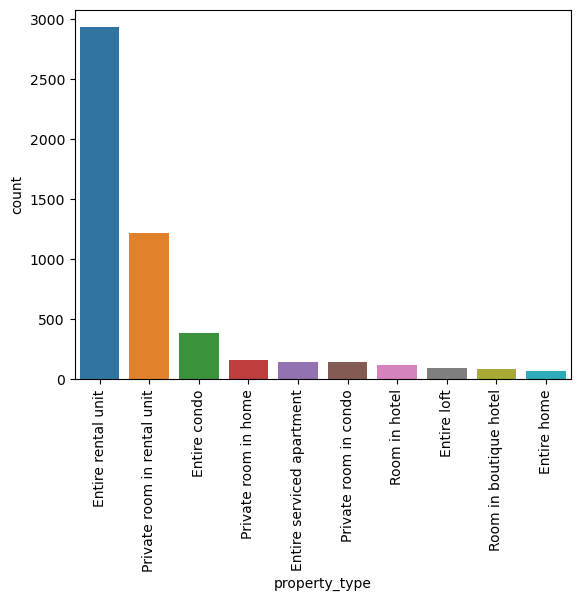

In [20]:
ax = sns.countplot(x='property_type', data=df, order=df['property_type'].value_counts().iloc[:10].index)
plt.xticks(rotation=90);

A partir de este análisis, podemos observar que alrededor del 60% de las propiedades en la base de datos corresponden a 'entire_rental_unit' información que resultará de valor próximamente al momento de recomendar alternativas de inversión.

#### Variable Precio ('price')

Nos encontramos con la primera variable numérica de nuestro dataset, sin embargo antes de poder analizarla, se le debe hacer una conversión de tipo, en este caso de object a float, esto con el fin de poder analizar su comportamiento como variable numérica y no categórica.

In [21]:
# Creamos la nueva columna con el valor de precio en formato float
df["price_float"] = df["price"].str.replace("[$,]", "", regex=True).astype(float)
# Eliminamos la columna original del dataframe
df = df.drop("price", axis=1)

Ahora procedemos a calcular las medidas de tendencia central para nuestra columna precio.

In [22]:
df["price_float"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count     5677.000000
mean       174.873877
std       1289.385944
min          0.000000
5%          39.000000
25%         69.000000
50%        100.000000
75%        179.000000
95%        442.200000
max      96274.000000
Name: price_float, dtype: float64

Removeremos outliers mediante el método del Z-score:

In [23]:
z_scores = stats.zscore(df['price_float'])
df = df[(z_scores < 3) & (z_scores > -3)]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5675 entries, 0 to 5676
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  5675 non-null   object 
 1   property_type           5675 non-null   object 
 2   number_of_reviews       5675 non-null   int64  
 3   review_scores_rating    5675 non-null   float64
 4   price_float             5675 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 266.0+ KB


Vemos que solo se removieron 2 entradas del conjunto original, por lo cual confirma que tomamos la decisión correcta.

Procederemos a realizar un histograma para la visualización de la distribución, pero antes encontraremos el rango intercuartil y solo graficaremos este rango, para ver la distribución de una manera más limpia y clara.

In [25]:
q1 = df["price_float"].quantile(0.25)
q3 = df["price_float"].quantile(0.75)
iqr = q3 - q1

[]

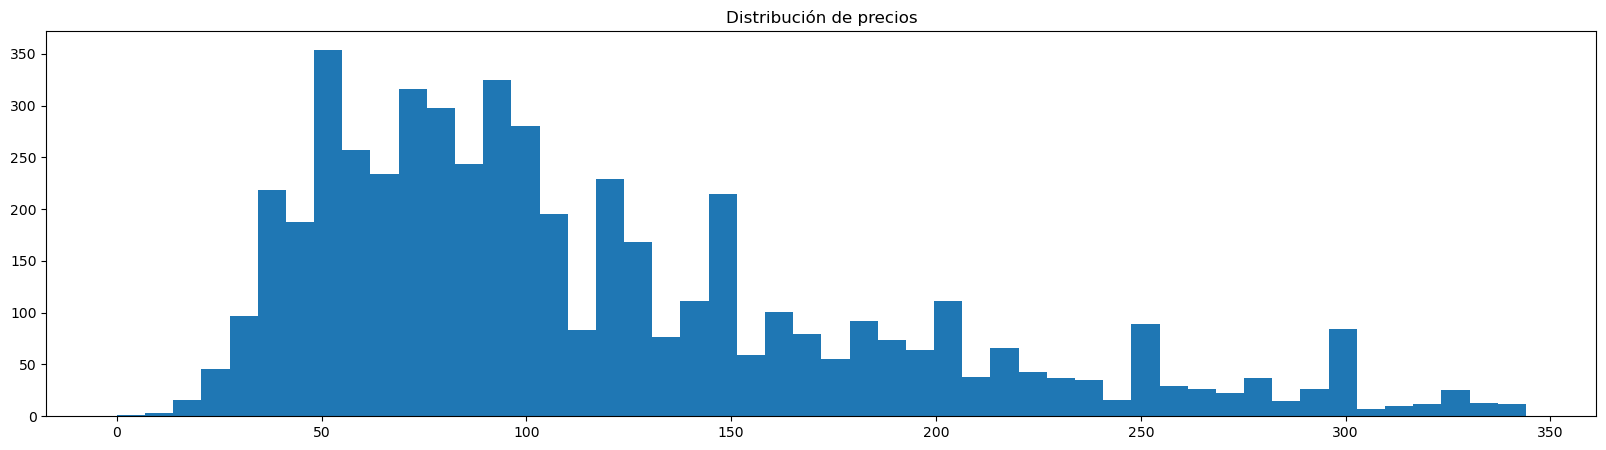

In [26]:
plt.figure(figsize=(20, 5))
plt.hist(df.loc[df["price_float"] <= (q3 + 1.5 * iqr)]["price_float"], bins=50)
plt.title("Distribución de precios")
plt.plot()

Realizamos ahora un boxplot para observar de manera más clara las medidas de tendencia central.

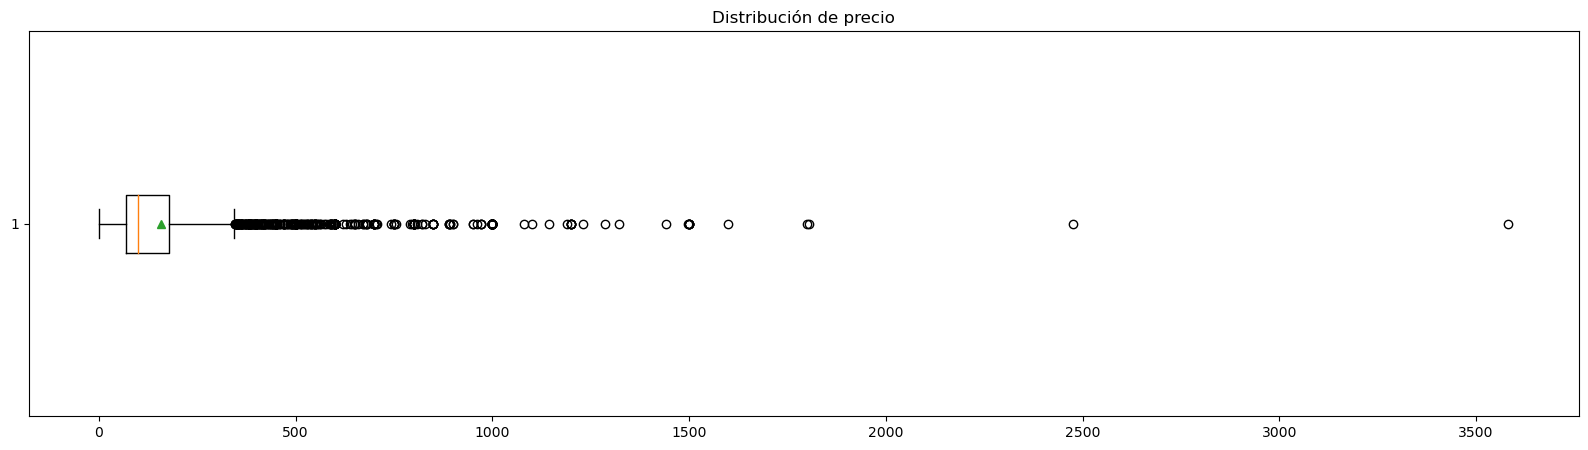

In [27]:
plt.figure(figsize=(20, 5))
plt.boxplot(df["price_float"], showmeans=True, vert=False)
plt.title("Distribución de precio")
plt.show()

#### Variable Número de Reseñas ('number_of_reviews')

Calculamos las medidas de tendencia central para nuestra columna número de reseñas.

In [28]:
df["number_of_reviews"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    5675.000000
mean       25.373744
std        69.143216
min         0.000000
5%          0.000000
25%         1.000000
50%         5.000000
75%        19.000000
95%       116.300000
max      1487.000000
Name: number_of_reviews, dtype: float64

Ahora realizamos un histograma para visualizar su distribución, no sin antes discriminar nuestros datos por su rango intercuartil:

In [29]:
q1 = df["number_of_reviews"].quantile(0.25)
q3 = df["number_of_reviews"].quantile(0.75)
iqr = q3 - q1

[]

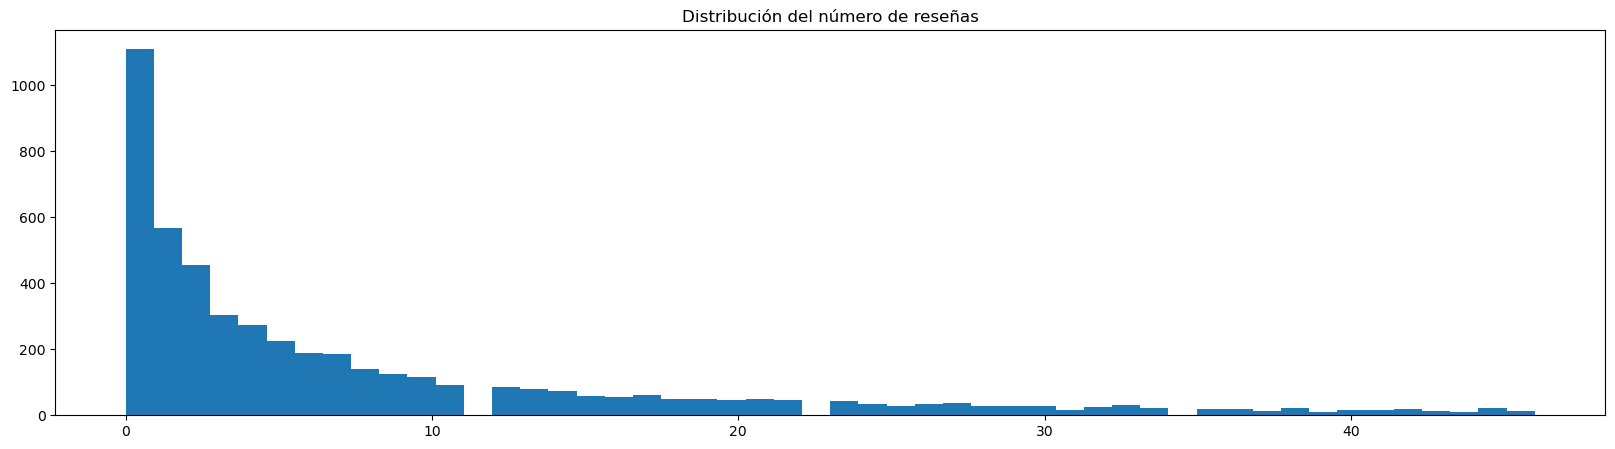

In [30]:
plt.figure(figsize=(20, 5))
plt.hist(df.loc[df["number_of_reviews"] <= (q3 + 1.5 * iqr)]["number_of_reviews"], bins=50)
plt.title("Distribución del número de reseñas")
plt.plot()

Realizamos ahora un boxplot para observar de manera más clara las medidas de tendencia central.

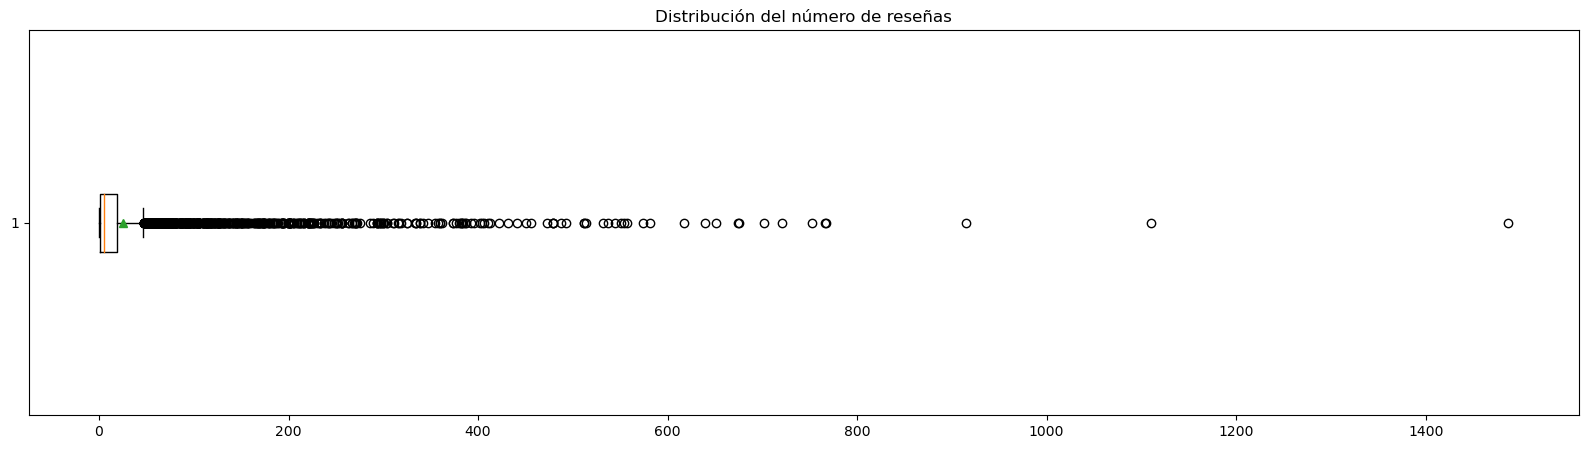

In [31]:
plt.figure(figsize=(20, 5))
plt.boxplot(df["number_of_reviews"], showmeans=True, vert=False)
plt.title("Distribución del número de reseñas")
plt.show()

#### Variable puntuación total ('review_scores_rating')

Calculamos las medidas de tendencia central para nuestra de puntuación total.

In [32]:
df["review_scores_rating"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    5675.000000
mean        4.784672
std         0.397673
min         0.000000
5%          4.130000
25%         4.750000
50%         4.890000
75%         5.000000
95%         5.000000
max         5.000000
Name: review_scores_rating, dtype: float64

Confirmamos la validez de los datos, ya que se encuentran en el rango de [0, 5]. Como no existen outliers no se hace necesario discriminar por rango intercuartil al momento de realizar gráficos de distribución, por esta razón procedemos a graficar un histograma.

[]

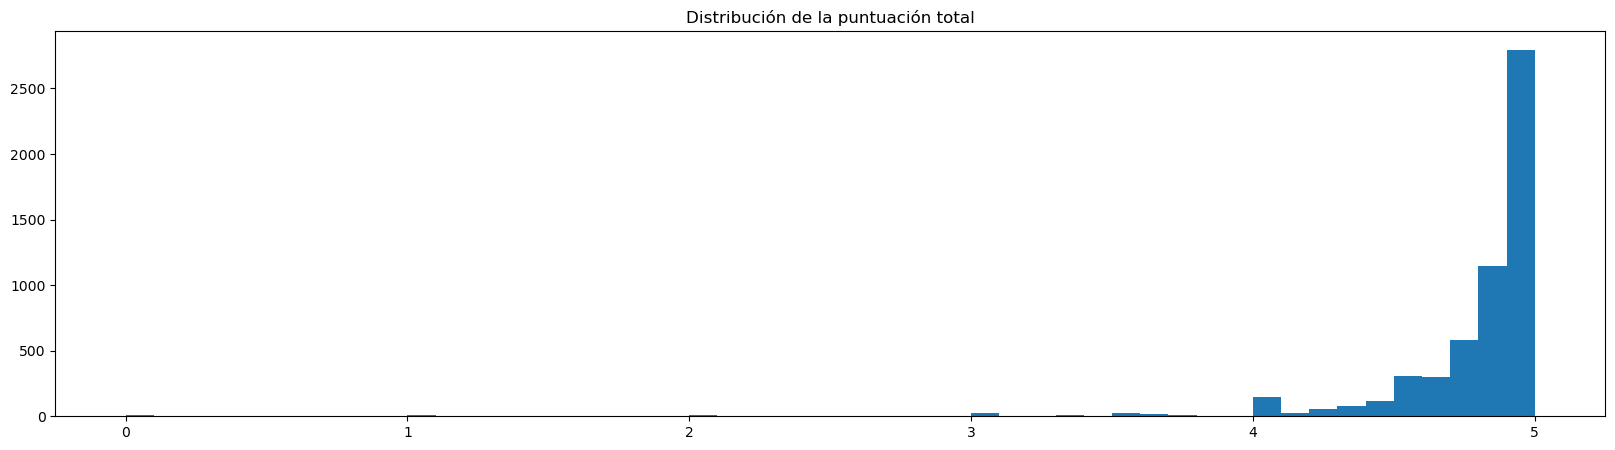

In [33]:
plt.figure(figsize=(20, 5))
plt.hist(df["review_scores_rating"], bins=50)
plt.title("Distribución de la puntuación total")
plt.plot()

Realizamos ahora un boxplot para observar de manera más clara las medidas de tendencia central.

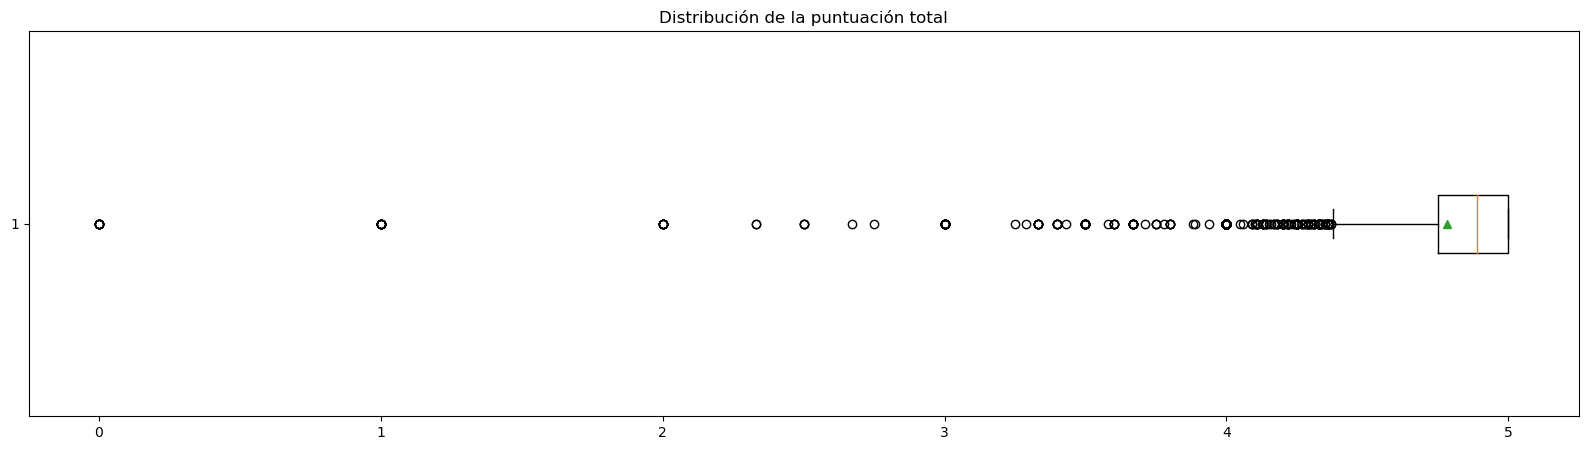

In [34]:
plt.figure(figsize=(20, 5))
plt.boxplot(df["review_scores_rating"], showmeans=True, vert=False)
plt.title("Distribución de la puntuación total")
plt.show()

## [15%] Estrategia de análisis

En primera instancia se desea hacer un análisis de correlación (para las variables numéricas) y un análisis de pareto (para las variables categóricas y su influencia en las variables de salida) con el fin realizar un ranking de la influencia de las variables de entrada (que serán las que le servirán al usuario para basar su decisión de inversión) en las variables de salida (que serán las que definan la futura rentabilidad de la inversión).

Como variables de entrada se escogieron:

* Barrio (neighbourhood_cleansed): Debido a que la ubicación es de las variables más importantes al realizar una inversión inmobiliaria.
* Tipo de propiedad (property_type): Es necesario entender el nicho de mercado al que se le apunta y entender que tipo de propiedades son más apetecidas en Munich.
* Precio (price): De acuerdo con la ciudad de la propiedad, el precio juega un papel importante para escoger la mejor inversión a realizar.

Y como variables de salida:

* Número de reseñas (number_of_reviews): Si bien pensamos que la puntuación de una propiedad es la variable más importante en la que los usuarios basan sus decisiones de alojamiento, varios estudios han demostrado que el número de reseñas es igual o más importante que la anterior, razón por la cual se debe incluir como variable de respuesta en nuestro análisis.
* Puntuación total (review_scores_rating): La puntuación total es la medida más directa del éxito de una propiedad.

Seguidamente, para cada variable de entrada se realizará un análisis bivariado con cada variable de salida con gráficos de dispersión (para variables de entrada numéricas), gráficos de barras (para variables de entrada categóricas) y cálculo de coeficientes de correlación lineales y monótonos (para variables de entrada numéricas), a partir de allí se determinarán las opciones de inversión dentro de cada variable de entrada que maximicen las variables de salida.


## [40%] Desarrollo de la estrategia

### Análisis de correlación (para variables numéricas)
En esta etapa se desea estudiar si existe una correlación significativa entre la variable numérica precio y las variables de salida número de reseñas y puntuación total.

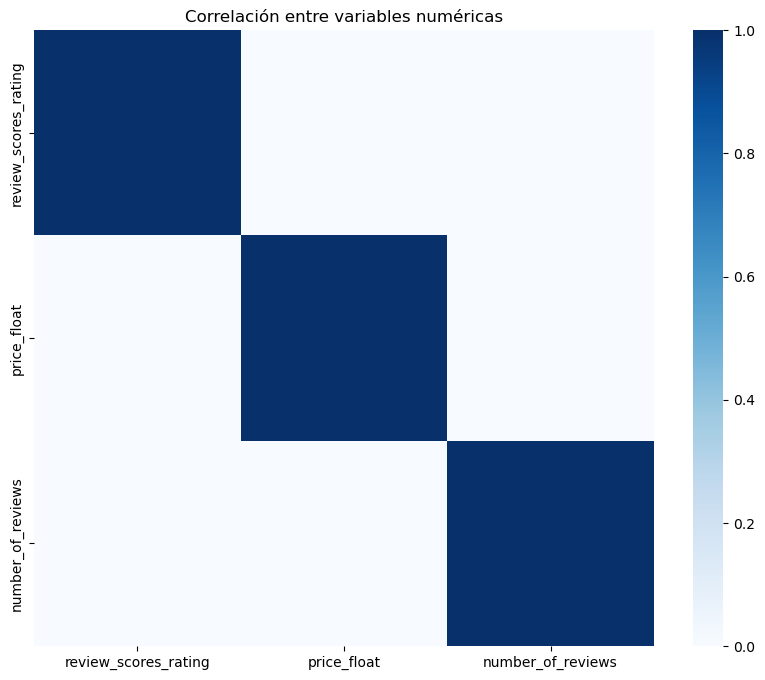

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    df[["review_scores_rating", "price_float", "number_of_reviews"]].corr(),
    vmin=0, vmax=1,
    cmap="Blues"
)
plt.title("Correlación entre variables numéricas")
plt.show()

Vemos que al parecer no existe influencia significativa entre la variable precio y el número de reseñas o la puntuación total, sin embargo en una próxima etapa revisaremos con más detalle estas relaciones.

### Análisis de pareto (para variables categóricas)
En esta etapa se desea rankear la importancia de las dos variables de entrada categóricas (barrio y tipo de propiedad) en lo que refiere a las dos variables de salida (número de reseñas y puntuación total). Para esto se utilizará el test chi-cuadrado de pandas).

Empezamos con el análisis de pareto para la variable número de reseñas:

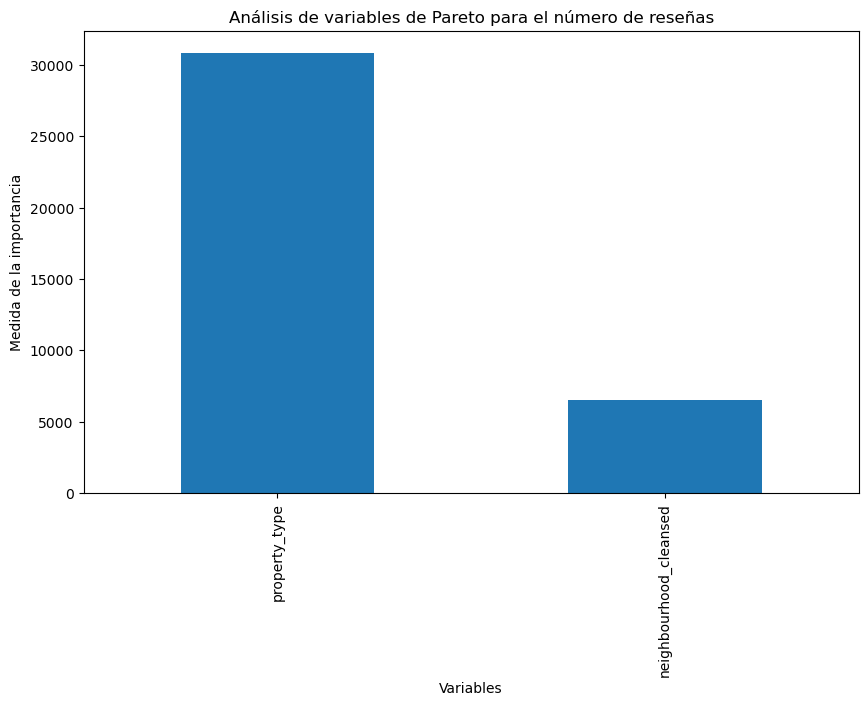

In [36]:
categorical_vars = ['neighbourhood_cleansed', 'property_type']
categorical_ranked = pd.Series(dtype=float)
for cat_var in categorical_vars:
    crosstab = pd.crosstab(df[cat_var], df['number_of_reviews'])
    chi2, p, _, _ = stats.chi2_contingency(crosstab)
    categorical_ranked[cat_var] = chi2

categorical_ranked = categorical_ranked.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
categorical_ranked.plot(kind='bar')
plt.xlabel('Variables')
plt.ylabel('Medida de la importancia')
plt.title('Análisis de variables de Pareto para el número de reseñas')
plt.show()

A partir del gráfico de pareto anterior, vemos que la variable que más influye en el número total de reseñas es el tipo de propiedad, posteriormente descubriremos que tipo de propiedades generan una mayor cantidad de reseña. El barrio parece no tener una influencia muy significativa en la variable de respuesta.

Continuamos con el análisis de pareto para la variable puntuación total:

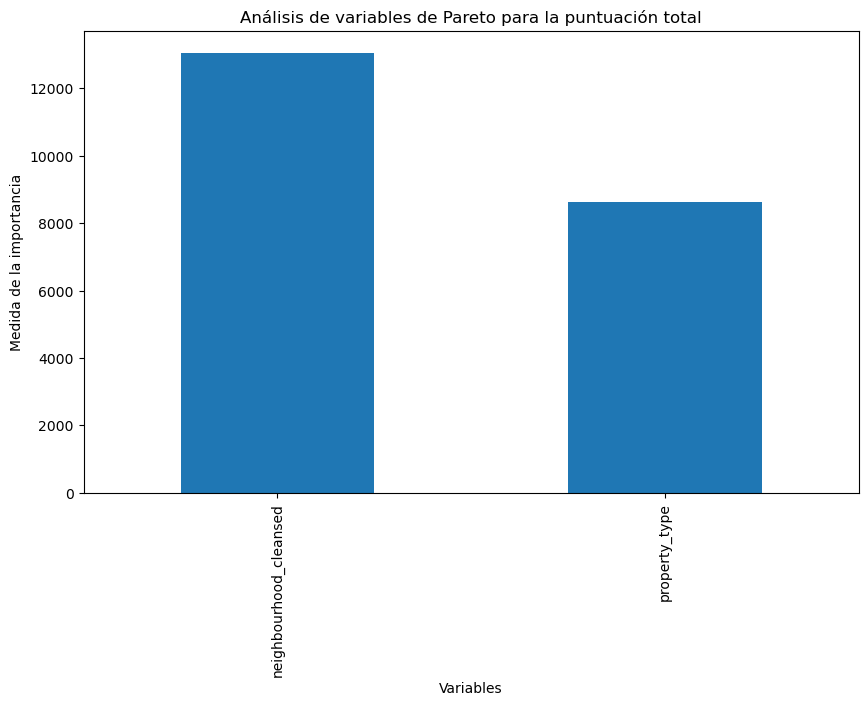

In [37]:
categorical_vars = ['neighbourhood_cleansed', 'property_type']
categorical_ranked = pd.Series(dtype=float)
for cat_var in categorical_vars:
    crosstab = pd.crosstab(df[cat_var], df['review_scores_rating'])
    chi2, p, _, _ = stats.chi2_contingency(crosstab)
    categorical_ranked[cat_var] = chi2

categorical_ranked = categorical_ranked.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
categorical_ranked.plot(kind='bar')
plt.xlabel('Variables')
plt.ylabel('Medida de la importancia')
plt.title('Análisis de variables de Pareto para la puntuación total')
plt.show()

En el caso de la variable de respuesta puntuación total, la variable barrio parece tener una influencia mayor que el tipo de propiedad, sin embargo la diferencia no llega a ser tan grande como en el análisis de pareto de la variable número de reseñas, por lo cual se hace necesario estudiar la influencia de ambas variables de entrada en la puntuación total.

## Análisis bivariado para variables de entrada numéricas
En esta etapa se busca analizar tendencias entre la variable de entrada precio y las variables de salida número de reseñas y puntuación total, para ello se realizarán gráficos de dispersión y se calcularán coeficientes de correlación lineales (pearson) y monótonos (spearman).

Empezamos con la relación entre el precio y el número de reseñas.

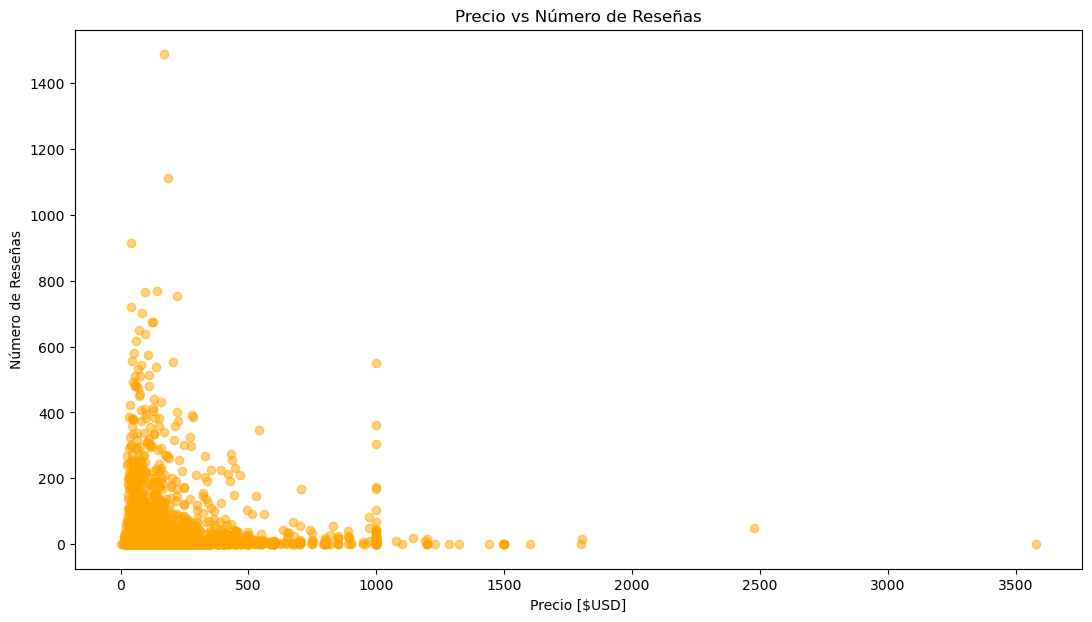

In [38]:
plt.figure(figsize = (13, 7))
plt.scatter(df['price_float'], df['number_of_reviews'], alpha = 0.5, color = 'orange')
plt.title('Precio vs Número de Reseñas')
plt.xlabel('Precio [$USD]')
plt.ylabel('Número de Reseñas')
plt.show()

In [39]:
df[['price_float', 'number_of_reviews']].corr()

,price_float,number_of_reviews
price_float,1.00000,-0.03288
number_of_reviews,-0.03288,1.00000


In [40]:
df[['price_float', 'number_of_reviews']].corr("spearman")

,price_float,number_of_reviews
price_float,1.000000,-0.119442
number_of_reviews,-0.119442,1.000000


Vemos que si bien los coeficientes nos indican que la correlación no es lo suficientemente significativa, si indican una ligera correlación inversa que se observa en el gráfico, donde a un menor precio de la propiedad se observa un mayor número de reseñas. En cualquier caso a partir de la gráfica, no se recomendaría la inversión en propiedades de más de US$1000 la noche, debido a que cuentan con un número reducido de reseñas que se traduce en una falta de popularidad de la propiedad.

Seguimos con la relación entre el precio y el puntaje total.

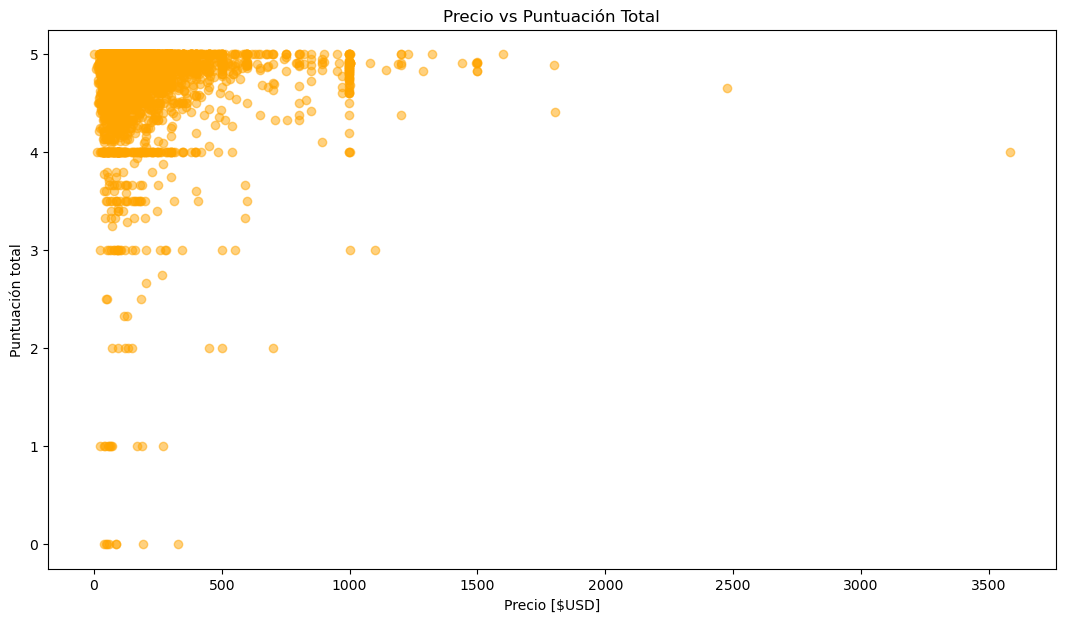

In [41]:
plt.figure(figsize = (13, 7))
plt.scatter(df['price_float'], df['review_scores_rating'], alpha = 0.5, color = 'orange')
plt.title('Precio vs Puntuación Total')
plt.xlabel('Precio [$USD]')
plt.ylabel('Puntuación total')
plt.show()

In [42]:
df[['price_float', 'review_scores_rating']].corr()

,price_float,review_scores_rating
price_float,1.000000,-0.015551
review_scores_rating,-0.015551,1.000000


In [43]:
df[['price_float', 'review_scores_rating']].corr("spearman")

,price_float,review_scores_rating
price_float,1.00000,0.02043
review_scores_rating,0.02043,1.00000


En este caso, vemos que ambos indicadores no se ponen de acuerdo en cuanto si la correlación es positiva o negativa, además por el gráfico se nota que no existe una tendencia muy clara, por lo cual se descarta una correlación significativa entre estas dos variables. 

## Análisis bivariado para variables de entrada categóricas
En esta etapa se busca analizar tendencias entre las variables de entrada barrio y tipo de propiedad y las variables de salida número de reseñas y puntuación total, para ello se realizarán gráficos de barras con los valores de mediana para las variables de respuesta y el número de entradas en los conjuntos de datos con cada una de las categorías de las variables de entrada. Esto con el fin de no solo fijarse en que las variables de entrada resulten en la maximización de las variables de salida, sino que también existan un número considerable de propiedades con las características deseadas. 

Empezamos con la variable de salida número de reseñas y la variable de entrada barrio.

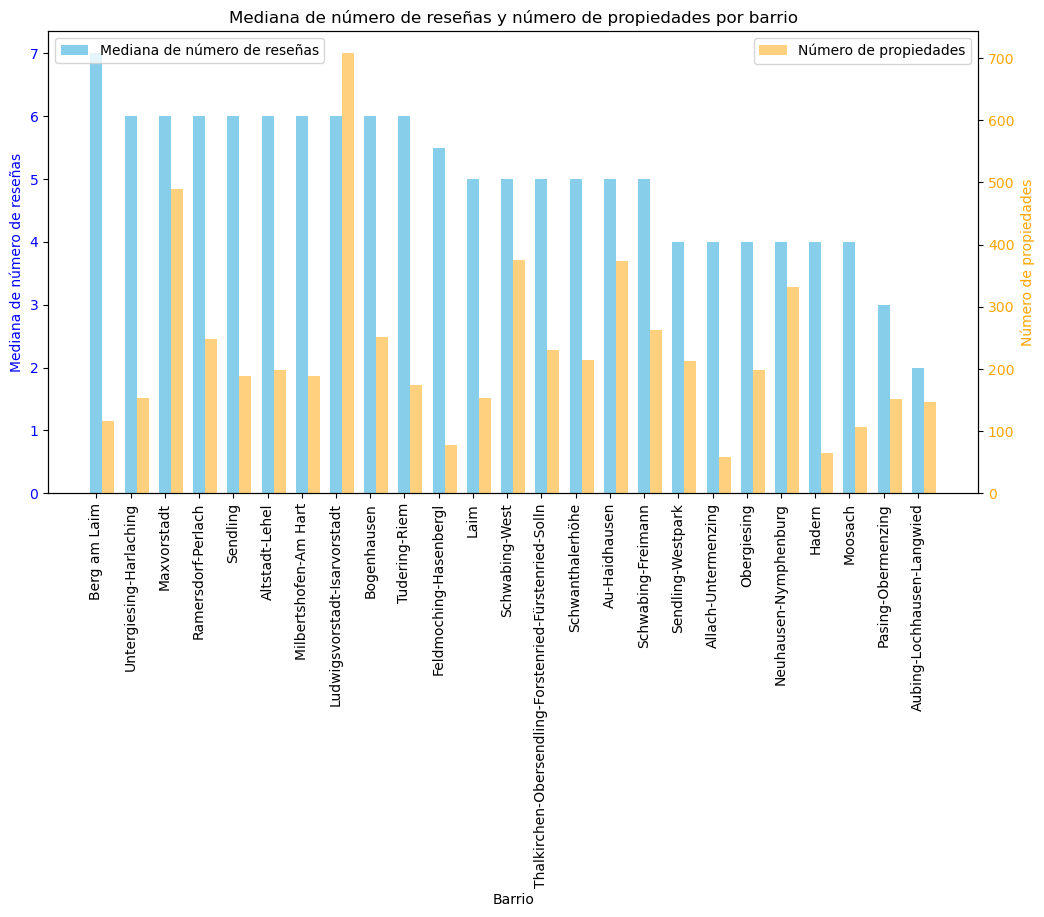

In [44]:
median_reviews_by_neighbourhood = df.groupby('neighbourhood_cleansed')['number_of_reviews'].median()
count_neighbourhood_appearances = df['neighbourhood_cleansed'].value_counts()

median_reviews_by_neighbourhood = median_reviews_by_neighbourhood.sort_values(ascending=False)
count_neighbourhood_appearances = count_neighbourhood_appearances.loc[median_reviews_by_neighbourhood.index]

fig, ax1 = plt.subplots(figsize=(12, 6))

x = np.arange(len(median_reviews_by_neighbourhood))

bar_width = 0.35

ax1.bar(x, median_reviews_by_neighbourhood, width=bar_width, color='skyblue', label='Mediana de número de reseñas')
ax1.set_xlabel('Barrio')
ax1.set_ylabel('Mediana de número de reseñas', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticks(x)
ax1.set_xticklabels(median_reviews_by_neighbourhood.index, rotation=90)

ax2 = ax1.twinx()

ax2.bar(x + bar_width, count_neighbourhood_appearances, width=bar_width, color='orange', alpha=0.5, label='Número de propiedades')
ax2.set_ylabel('Número de propiedades', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Mediana de número de reseñas y número de propiedades por barrio')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

Vemos que este gráfico nos da información muy importante respecto a los mejores barrios donde invertir. Se puede observar que barrios como Ramersforf-Perlach y Ludwigsvorstadt-Isarvorstadt cuentan con una buena media de número de reservas (6) y además existe un alto número de propiedades en ese sector, por lo cual resultan como alternativas atractivas para el potencial inversionista. 

Siguiendo con la misma variable de respuesta (número de reseñas) pasamos ahora a estudiar la influencia de la variable tipo de propiedad.

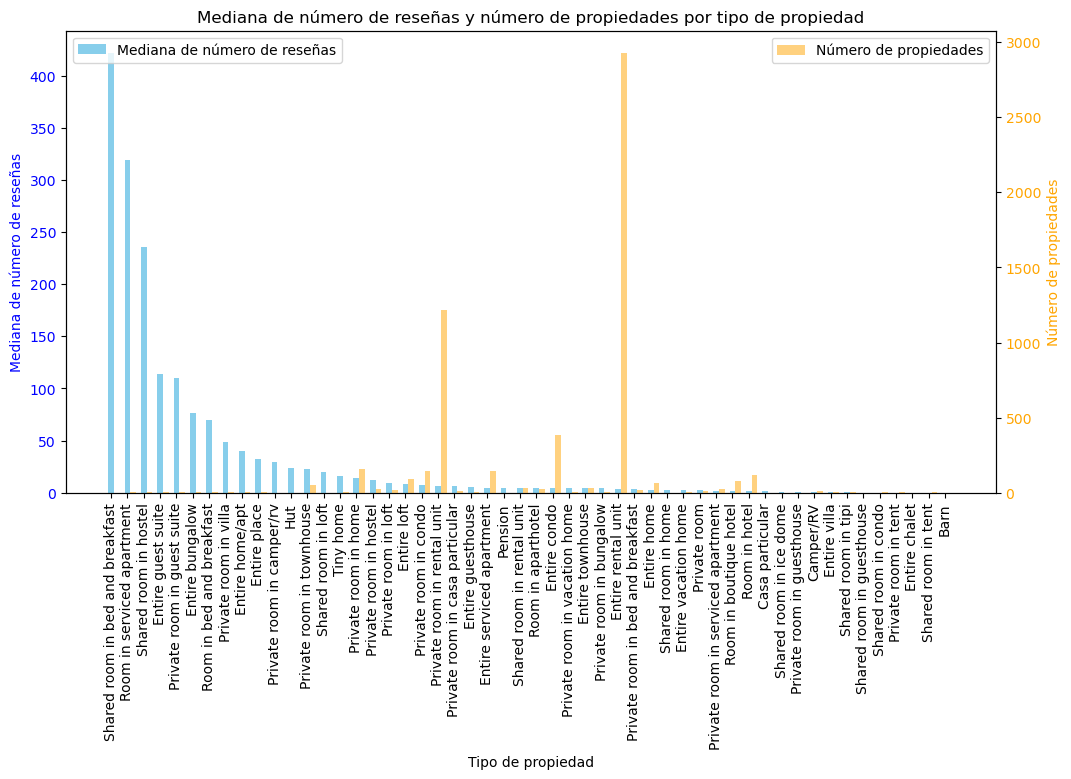

In [45]:
median_reviews_by_pt = df.groupby('property_type')['number_of_reviews'].median()
count_pt_appearances = df['property_type'].value_counts()

median_reviews_by_pt = median_reviews_by_pt.sort_values(ascending=False)
count_pt_appearances = count_pt_appearances.loc[median_reviews_by_pt.index]

fig, ax1 = plt.subplots(figsize=(12, 6))

x = np.arange(len(median_reviews_by_pt))

bar_width = 0.35

ax1.bar(x, median_reviews_by_pt, width=bar_width, color='skyblue', label='Mediana de número de reseñas')
ax1.set_xlabel('Tipo de propiedad')
ax1.set_ylabel('Mediana de número de reseñas', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticks(x)
ax1.set_xticklabels(median_reviews_by_pt.index, rotation=90)

ax2 = ax1.twinx()

ax2.bar(x + bar_width, count_pt_appearances, width=bar_width, color='orange', alpha=0.5, label='Número de propiedades')
ax2.set_ylabel('Número de propiedades', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Mediana de número de reseñas y número de propiedades por tipo de propiedad')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

A partir de este gráfico, se observa una tendencia curiosa. A pesar de que más de la mitad de propiedades en la base de datos corresponden a entire rental unit, estas no tienen tantas reseñas como se esperaría, probablemente porque si bien es el alojamiento más masivo, los huéspedes no viven una experiencia extraordinaria allí, por esta razón, invertir en otro tipo de propiedades podría llevar a una mejor rentabilidad. Para observar mejores opciones, reduciremos el rango del eje y secundario.

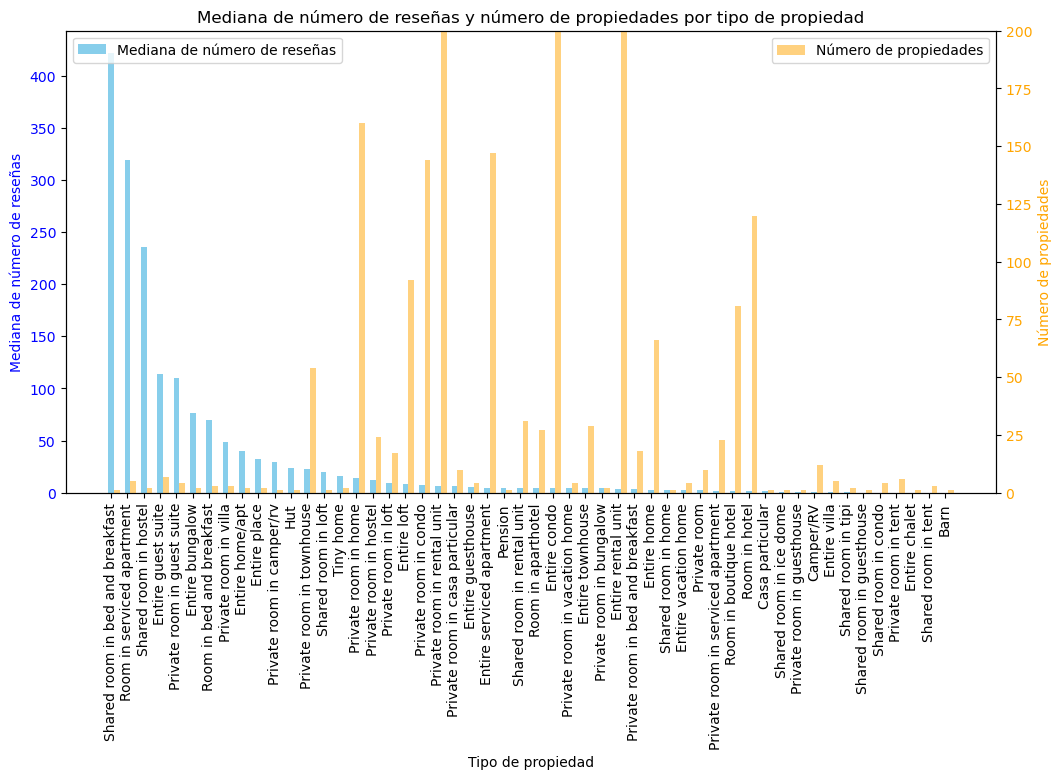

In [46]:
median_reviews_by_pt = df.groupby('property_type')['number_of_reviews'].median()
count_pt_appearances = df['property_type'].value_counts()

median_reviews_by_pt = median_reviews_by_pt.sort_values(ascending=False)
count_pt_appearances = count_pt_appearances.loc[median_reviews_by_pt.index]

fig, ax1 = plt.subplots(figsize=(12, 6))

x = np.arange(len(median_reviews_by_pt))

bar_width = 0.35

ax1.bar(x, median_reviews_by_pt, width=bar_width, color='skyblue', label='Mediana de número de reseñas')
ax1.set_xlabel('Tipo de propiedad')
ax1.set_ylabel('Mediana de número de reseñas', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticks(x)
ax1.set_xticklabels(median_reviews_by_pt.index, rotation=90)

ax2 = ax1.twinx()

ax2.bar(x + bar_width, count_pt_appearances, width=bar_width, color='orange', alpha=0.5, label='Número de propiedades')
ax2.set_ylabel('Número de propiedades', color='orange')
ax2.set_ylim(top=200)
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Mediana de número de reseñas y número de propiedades por tipo de propiedad')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

A partir del gráfico anterior, buenas opciones serían propiedades con al menos ya 25 alojamientos del mismo tipo existentes (para asegurar la inversión), y con las mayores medias de número de reseñas. Ejemplos serían: Private room in townhouse, private room in home, private room in hostel, private room in loft. Estas serían buenas opciones de inversión ya que si bien existen propiedades con estas características, sigue siendo un nicho de mercado sin explotar y que cuenta con muchas reseñas por parte de los usuarios.

Siguiendo con la variable de respuesta calificación total, estudiemos la influencia de el barrio:

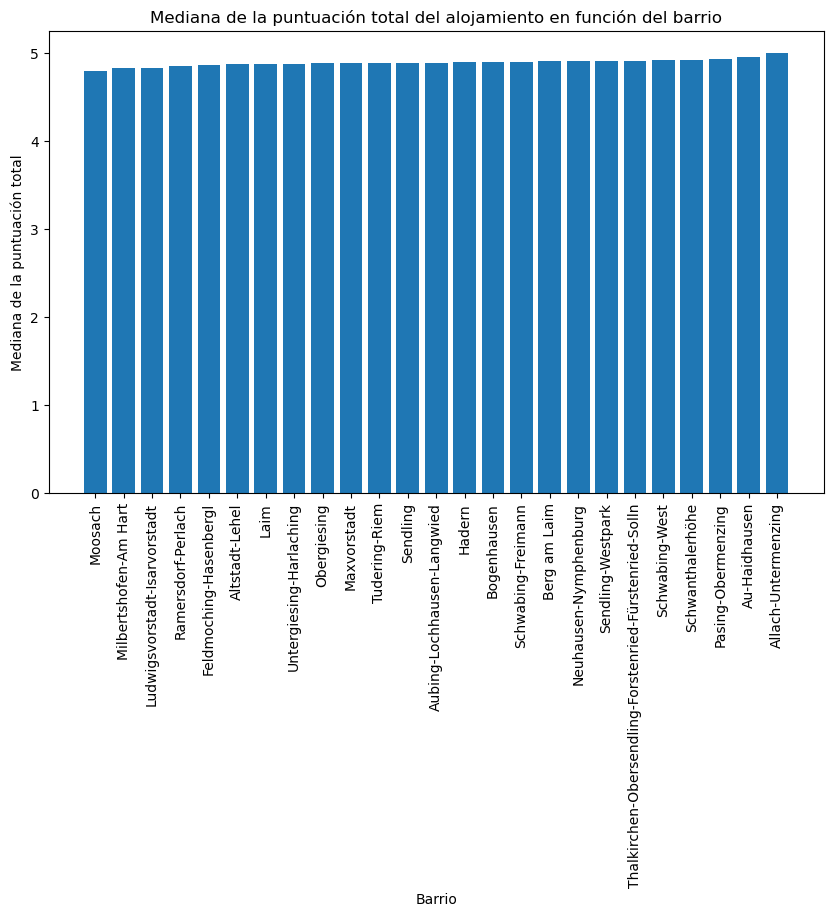

In [47]:
median_reviews = df.groupby('neighbourhood_cleansed')['review_scores_rating'].median().reset_index()
median_reviews = median_reviews.sort_values('review_scores_rating')

plt.figure(figsize=(10, 6))
plt.bar(median_reviews['neighbourhood_cleansed'], median_reviews['review_scores_rating'])
plt.xlabel('Barrio')
plt.ylabel('Mediana de la puntuación total')
plt.title('Mediana de la puntuación total del alojamiento en función del barrio')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

Vemos que el barrio tiene poca influencia en la puntuación, ya que como comprobamos anteriormente, este tiene mayor influencia en el número de reseñas.

Seguimos con el tipo de alojamiento y su influencia en la puntuación total.

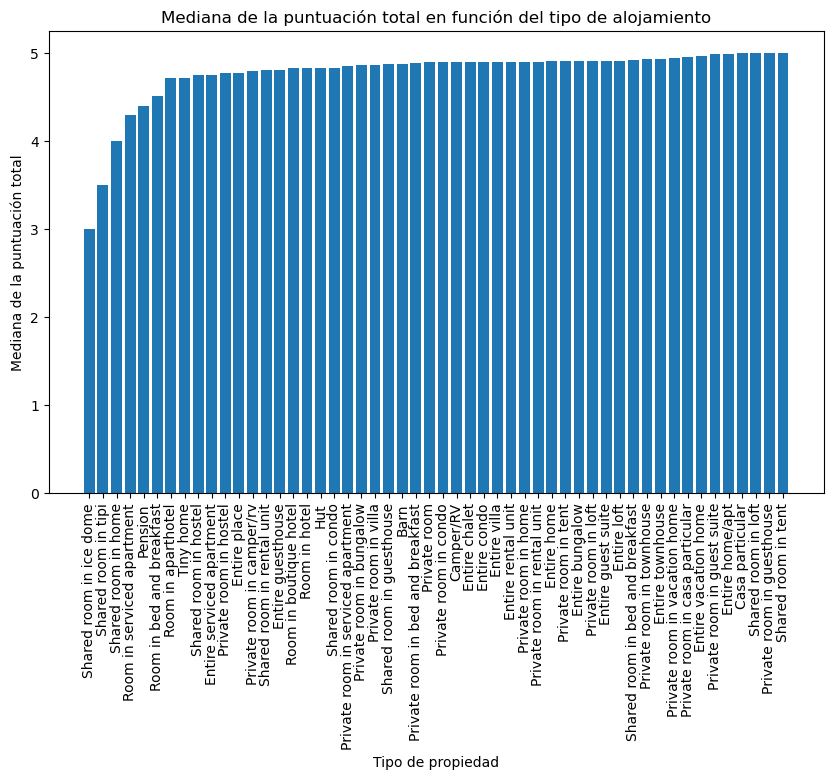

In [48]:
median_reviews = df.groupby('property_type')['review_scores_rating'].median().reset_index()
median_reviews = median_reviews.sort_values('review_scores_rating')

plt.figure(figsize=(10, 6))
plt.bar(median_reviews['property_type'], median_reviews['review_scores_rating'])
plt.xlabel('Tipo de propiedad')
plt.ylabel('Mediana de la puntuación total')
plt.title('Mediana de la puntuación total en función del tipo de alojamiento')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

Vemos que si bien la distribución es relativamente constante en valores entre 4.5 y 5. No recomendaría invertir en los 5 primeros tipos de propiedades del gráfico, ya que su mediana es mucho menor al resto de propiedades. En resumen, evitar tipo de propiedades como: Shared room in dome, shared room in tipi, shared room in home, room in serviced apartment o pension. Se observa una tendencia generalizada de menor calificación en propiedades compartidas. 

### Insights obtenidos del análisis de datos:
* A partir del análisis de pareto y análisis de correlación, se pudo concluir que en términos generales, variables como el tipo de propiedad y barrio cuentan con una influencia mayor en las variables de respuesta (número de reseñas y puntuación) que variables como el precio.
* Si bien el precio no cuenta con una significancia alta se prefieren propiedades con precio menor a USD$1000 por noche con el fin de contar con mayor número de reseñas (al ser mucho más asequibles para el público en general.
* Existe una correlación significativa entre la ubicación del alojamiento y el número de reseñas. Para recomendar propiedades por barrio, también se tuvo en cuenta que existieran ya cierta cantidad de propiedades en ese sector. Se recomienda especialmente invertir principalmente en los sectores de Ramersforf-Perlach y Ludwigsvorstadt-Isarvorstadt, seguidos de Schwabing-West y Au-Haidhausen.
* En cuanto al tipo de propiedad, descartaría a alojamientos de tipo entire rental unit debido a que considero que el mercado se puede encontrar saturado, debido a una gran cantidad de alojamientos de este tipo, pero pocas reseñas. Optaría mejor por alojamientos de tipo private room in townhouse, private room in home, private room in hostel y private room in loft, ya que cuentan con un alto número de reviews, y si bien hay una cantidad considerable de estos alojamientos, el mercado se encuentra lejos de estar saturado.
* Concierne a la puntuación de un alojamiento, no se encontro una relación significativa con el barrio, sin embargo, por una relación negativa con cierto tipo de alojamientos, no se recomienda la inversión en alojamientos compartidos, así como shared room in dome, shared room in tipi, shared room in home, room in serviced apartment o pension, ya que cuentan con las calificaciones más bajas de todos los tipos.

## [25%] Generación de resultados

En el repositorio de GitHub donde se encuentra este notebook también se encuentra una presentación ejecutiva con los principales insights de este análisis.